In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
import scipy.signal as sg
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

(-0.2, 0.2)

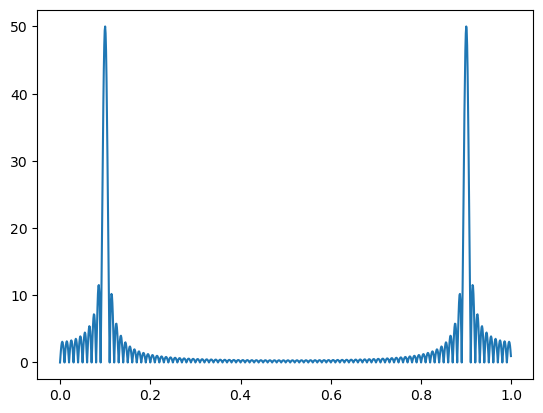

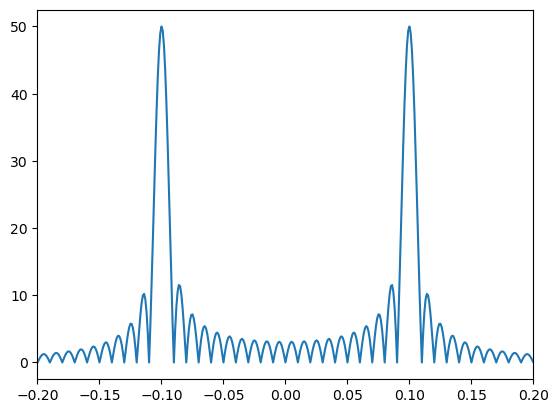

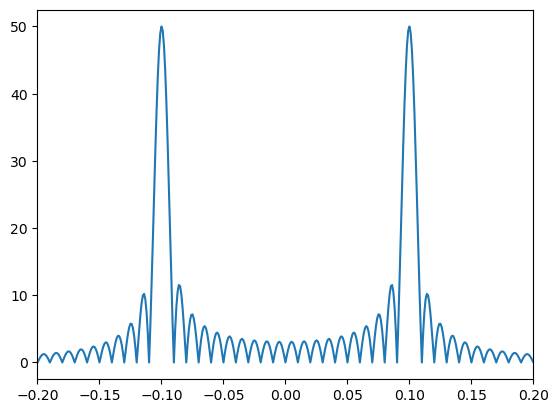

In [11]:
duree_signal=100
duree_avec_padding=1000
signal=np.sin(2*np.pi*0.1*np.arange(100))
signal_padde=np.concatenate((signal,np.zeros(duree_avec_padding-duree_signal)))
plt.figure(1)
f=np.arange(duree_avec_padding)/duree_avec_padding
plt.plot(f,np.abs(fft(signal_padde)))
plt.figure(2)
plt.plot(f-1/2,np.abs(np.fft.fftshift(fft(signal_padde))))
plt.xlim([-0.2 , 0.2])
# NB : l’ajout de zeros à un signal, pour augmenter la résolution fréquentielle
# de la TFD, peut être simulé sns explicitement ajouter des 0
plt.figure(3)
plt.plot(f-1/2,abs(np.fft.fftshift(fft(signal,duree_avec_padding))))
plt.xlim([-0.2 , 0.2])

# Vous créerez des signaux contenant les K = 100 premiers points de chaque fenêtre
# sur une première figure, vous afficherez en superposition les signaux temporels correspondants,

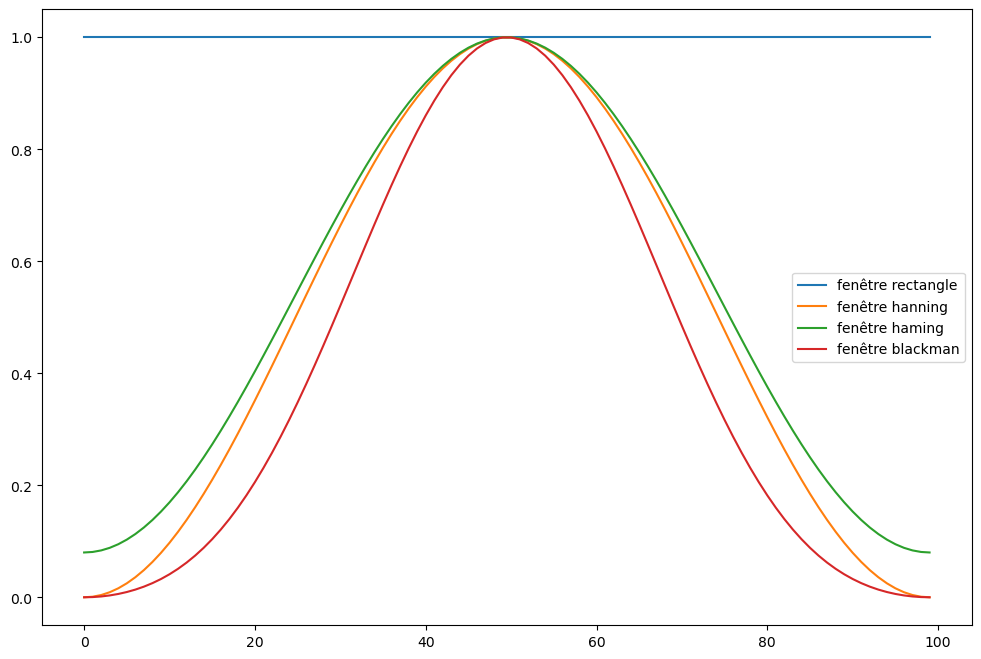

In [15]:
#Vous créerez des signaux contenant les K = 100 premiers points de chaque fenêtre
k=100
rect=np.ones(k)
han=sg.hann(k)
hamm=sg.hamming(k)
black=sg.blackman(k)
x=np.arange(k)
plt.figure(figsize=(12,8))
plt.plot(x,rect,label='fenêtre rectangle')
plt.plot(x,han,label='fenêtre hanning')
plt.plot(x,hamm,label='fenêtre haming')
plt.plot(x,black,label='fenêtre blackman')
plt.legend()

# sur une seconde figure, vous afficherez le résultat de la multiplication d’un sinus par chacune des fenêtres,
# toujours en superposition,

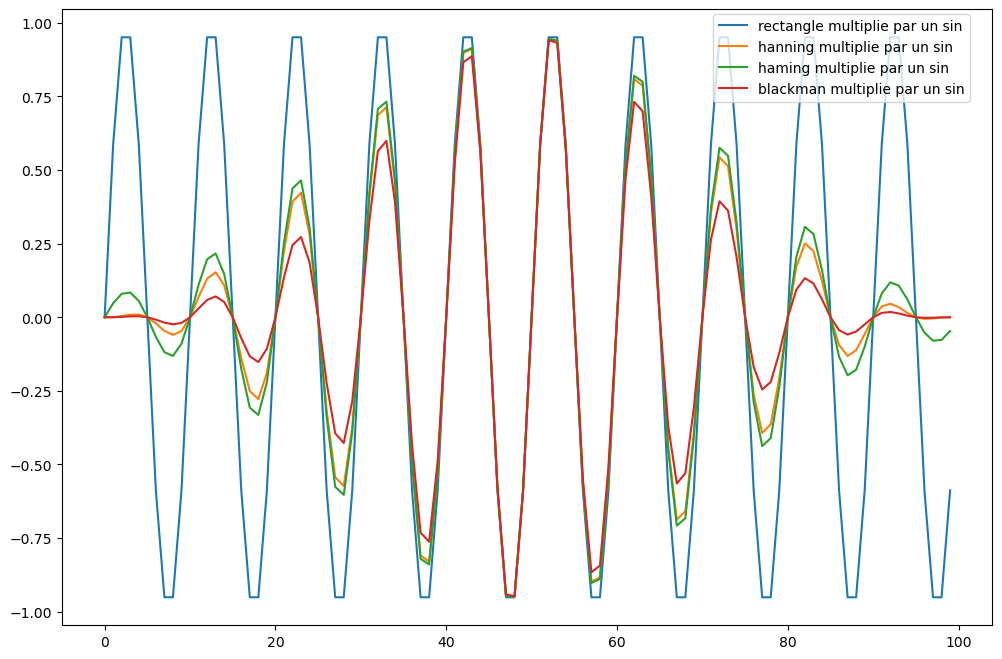

In [16]:
signal=np.sin(2*np.pi*0.1*np.arange(k))
plt.figure(figsize=(12,8))
plt.plot(x,rect*signal,label='rectangle multiplie par un sin')
plt.plot(x,han*signal,label='hanning multiplie par un sin')
plt.plot(x,hamm*signal,label='haming multiplie par un sin')
plt.plot(x,black*signal,label='blackman multiplie par un sin')
plt.legend(loc=[0.7,0.85])

# Sur une troisième figure, vous comparerez les spectres de chacune des fenêtres en linéaire.

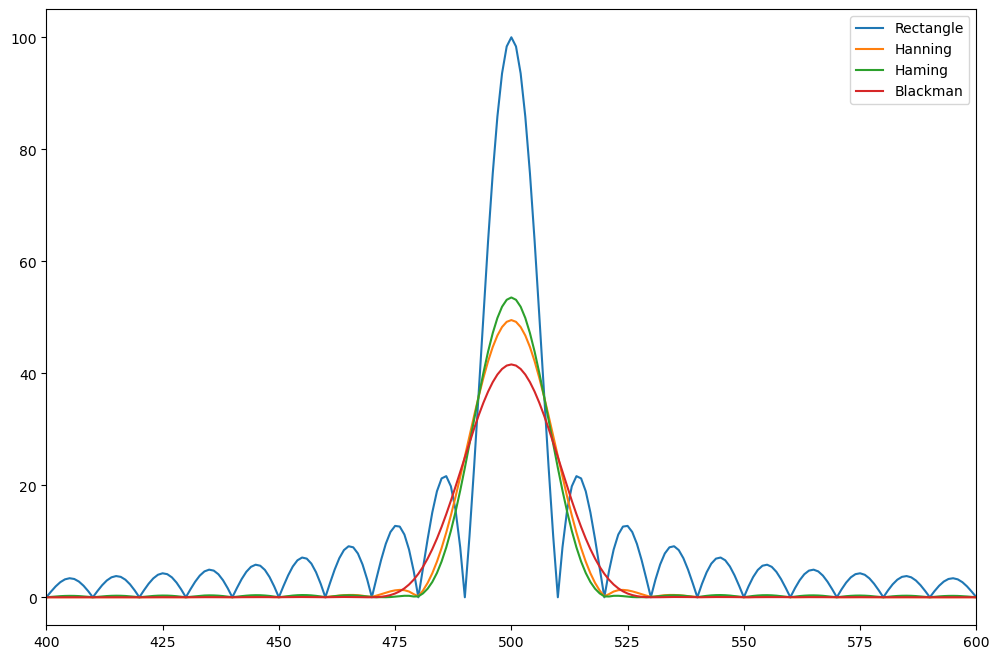

In [17]:
x=np.arange(1000)
plt.figure(figsize=(12,8))
plt.plot(x,np.abs(np.fft.fftshift(fft(rect,1000))),label='Rectangle')
plt.plot(x,np.abs(np.fft.fftshift(fft(han,1000))),label='Hanning')
plt.plot(x,np.abs(np.fft.fftshift(fft(hamm,1000))),label='Haming')
plt.plot(x,np.abs(np.fft.fftshift(fft(black,1000))),label='Blackman')
plt.xlim([400,600])
plt.legend()

# enfin, sur une quatrième figure, vous afficherez le même résultat sur une échelle en dB

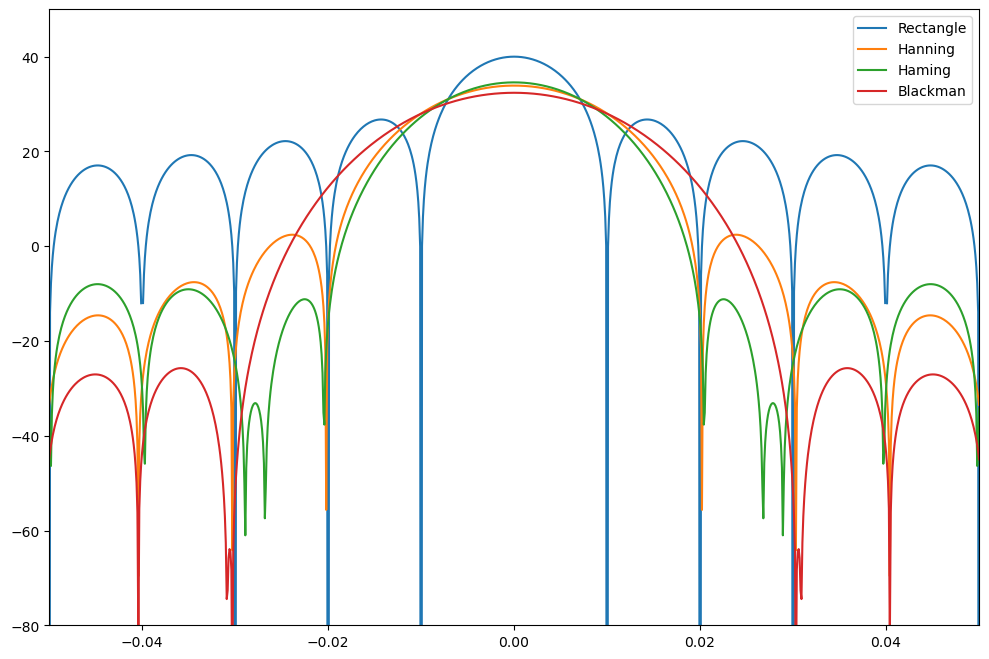

In [18]:
x=(np.arange(10000)/10000)-0.5
plt.figure(figsize=(12,8))
plt.plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(rect,10000)))),label='Rectangle')
plt.plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(han,10000)))),label='Hanning')
plt.plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(hamm,10000)))),label='Haming')
plt.plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(black,10000)))),label='Blackman')
plt.xlim([-0.05, 0.05])
plt.ylim([-80, 50])
plt.legend()

# Vous calculerez également la puissance sous chacune des fenêtres

In [19]:
def calcul_puissance(sign):
    return sum([i**2 for i in sign])

# Puissance de Hanning

In [97]:
calcul_puissance(han)

37.125

# Puissance de Haming

In [99]:
calcul_puissance(hamm)

39.349000000000004

# Puissance de Blackman

In [98]:
calcul_puissance(black)

30.155399999999997

In [43]:
df=pd.DataFrame(columns=['Largeur du lobe principal' ,'Atténuation en dB ','Puissance sous la fenêtre'],
             index=['Rectangle','Hanning','Hamming','Blackman'])

In [44]:
largeur_lob_rectangle=0.02
largeur_lob_hanning=0.04
largeur_lob_haming=0.04
largeur_lob_blackman=0.06
df['Largeur du lobe principal']=[0.02,0.04,0.04,0.06]
df['Puissance sous la fenêtre']=[calcul_puissance(rect),calcul_puissance(han),calcul_puissance(hamm),calcul_puissance(black)]
df['Atténuation en dB ']=[13,31,41,57]

In [45]:
df

,Largeur du lobe principal,Atténuation en dB,Puissance sous la fenêtre
Rectangle,0.02,13,100.0000
Hanning,0.04,31,37.1250
Hamming,0.04,41,39.3490
Blackman,0.06,57,30.1554


# Exercice 2 – Influence des différentes fenêtres sur la résolution fréquentielle de la TFD

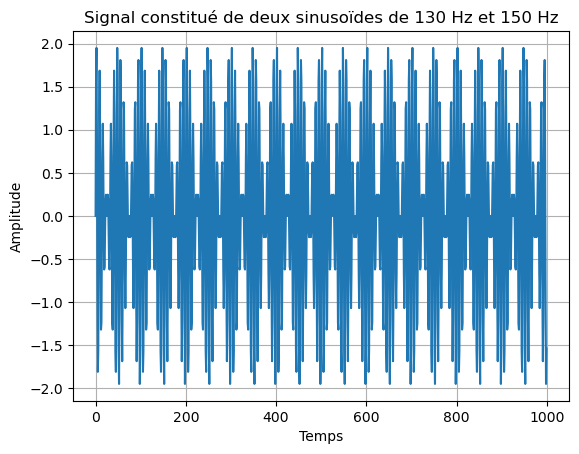

In [2]:
f1=130 
f2=150
amplitude=1
fe=1000
temps=np.arange(fe)/fe
signal=amplitude*np.sin(2*np.pi*f1*temps)+np.sin(2*np.pi*f2*temps)
plt.plot(signal)
plt.title('Signal constitué de deux sinusoïdes de 130 Hz et 150 Hz')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.grid(True)

# Sur 32 points

Text(0.5, 1.0, 'fenêtre blackman')

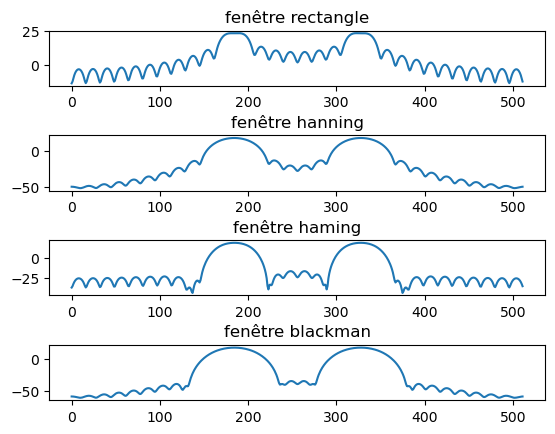

In [3]:
#Vous créerez des signaux contenant les K = 100 premiers points de chaque fenêtre
k=32
rect=np.ones(k)
rect=np.concatenate((rect,np.zeros(fe-k)))
han=sg.hann(k)
han=np.concatenate((han,np.zeros(fe-k)))
hamm=sg.hamming(k)
hamm=np.concatenate((hamm,np.zeros(fe-k)))
black=sg.blackman(k)
black=np.concatenate((black,np.zeros(fe-k)))
x=np.arange(512)

fig,axe=plt.subplots(4,1)
plt.subplots_adjust(hspace=0.9)
axe[0].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(rect*signal,512)))))
axe[0].set_title('fenêtre rectangle')
axe[1].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(han*signal,512)))))
axe[1].set_title('fenêtre hanning')
axe[2].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(hamm*signal,512)))))
axe[2].set_title('fenêtre haming')
axe[3].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(black*signal,512)))))
axe[3].set_title('fenêtre blackman')

# Sur 64 points

Text(0.5, 1.0, 'fenêtre blackman')

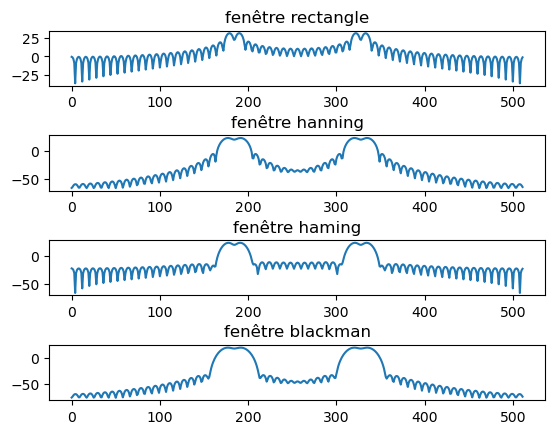

In [86]:
#Vous créerez des signaux contenant les K = 100 premiers points de chaque fenêtre
k=64
rect=np.ones(k)
rect=np.concatenate((rect,np.zeros(fe-k)))
han=sg.hann(k)
han=np.concatenate((han,np.zeros(fe-k)))
hamm=sg.hamming(k)
hamm=np.concatenate((hamm,np.zeros(fe-k)))
black=sg.blackman(k)
black=np.concatenate((black,np.zeros(fe-k)))
x=np.arange(512)

fig,axe=plt.subplots(4,1)
plt.subplots_adjust(hspace=0.9)
axe[0].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(rect*signal,512)))))
axe[0].set_title('fenêtre rectangle')
axe[1].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(han*signal,512)))))
axe[1].set_title('fenêtre hanning')
axe[2].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(hamm*signal,512)))))
axe[2].set_title('fenêtre haming')
axe[3].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(black*signal,512)))))
axe[3].set_title('fenêtre blackman')

# Sur 128 points

Text(0.5, 1.0, 'fenêtre blackman')

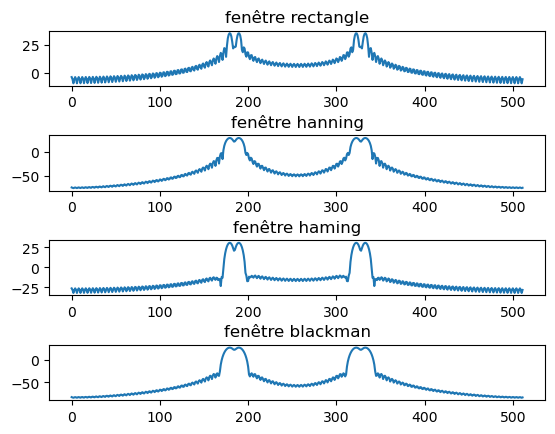

In [88]:
#Vous créerez des signaux contenant les K = 100 premiers points de chaque fenêtre
k=128
rect=np.ones(k)
rect=np.concatenate((rect,np.zeros(fe-k)))
han=sg.hann(k)
han=np.concatenate((han,np.zeros(fe-k)))
hamm=sg.hamming(k)
hamm=np.concatenate((hamm,np.zeros(fe-k)))
black=sg.blackman(k)
black=np.concatenate((black,np.zeros(fe-k)))
x=np.arange(512)

fig,axe=plt.subplots(4,1)
plt.subplots_adjust(hspace=0.9)
axe[0].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(rect*signal,512)))))
axe[0].set_title('fenêtre rectangle')
axe[1].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(han*signal,512)))))
axe[1].set_title('fenêtre hanning')
axe[2].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(hamm*signal,512)))))
axe[2].set_title('fenêtre haming')
axe[3].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(black*signal,512)))))
axe[3].set_title('fenêtre blackman')

# Quelle est l’effet de la modification de la durée du signal, expliquez.

## Ca dimunie la bande de transition et augmente les oscillation sur la bande attenuer

# Exercice 3 – Influence des différentes fenêtres sur la résolution en amplitude de la TFD

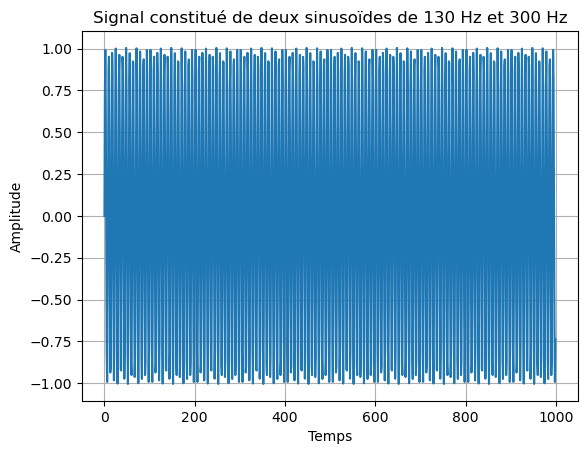

In [92]:
f1=130 
f2=300
amplitude=1
fe=1000
temps=np.arange(fe)/fe
signal=amplitude*np.sin(2*np.pi*f1*temps)+ 1/100*np.sin(2*np.pi*f2*temps)
plt.plot(signal)
plt.title('Signal constitué de deux sinusoïdes de 130 Hz et 300 Hz')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.grid(True)

Text(0.5, 1.0, 'fenêtre blackman')

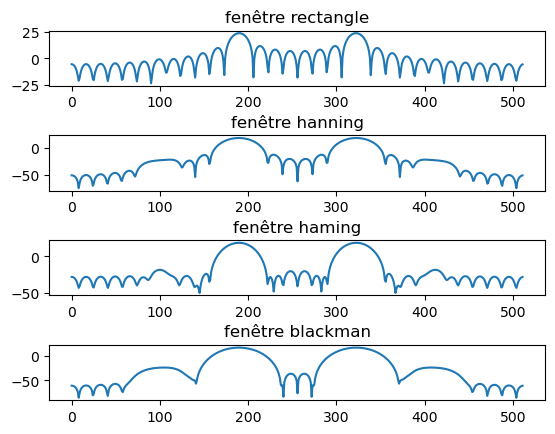

In [93]:
#Vous créerez des signaux contenant les K = 100 premiers points de chaque fenêtre
k=32
rect=np.ones(k)
rect=np.concatenate((rect,np.zeros(fe-k)))
han=sg.hann(k)
han=np.concatenate((han,np.zeros(fe-k)))
hamm=sg.hamming(k)
hamm=np.concatenate((hamm,np.zeros(fe-k)))
black=sg.blackman(k)
black=np.concatenate((black,np.zeros(fe-k)))
x=np.arange(512)

fig,axe=plt.subplots(4,1)
plt.subplots_adjust(hspace=0.9)
axe[0].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(rect*signal,512)))))
axe[0].set_title('fenêtre rectangle')
axe[1].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(han*signal,512)))))
axe[1].set_title('fenêtre hanning')
axe[2].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(hamm*signal,512)))))
axe[2].set_title('fenêtre haming')
axe[3].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(black*signal,512)))))
axe[3].set_title('fenêtre blackman')

Text(0.5, 1.0, 'fenêtre blackman')

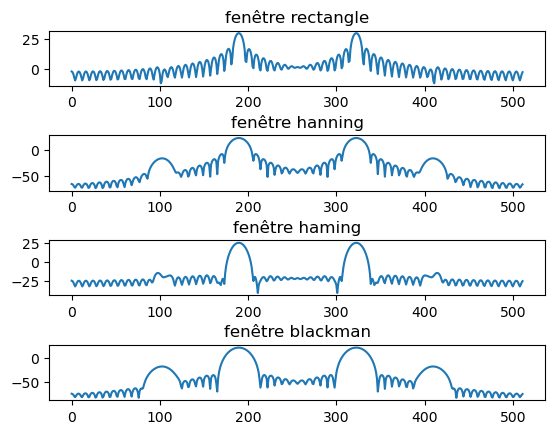

In [94]:
#Vous créerez des signaux contenant les K = 100 premiers points de chaque fenêtre
k=64
rect=np.ones(k)
rect=np.concatenate((rect,np.zeros(fe-k)))
han=sg.hann(k)
han=np.concatenate((han,np.zeros(fe-k)))
hamm=sg.hamming(k)
hamm=np.concatenate((hamm,np.zeros(fe-k)))
black=sg.blackman(k)
black=np.concatenate((black,np.zeros(fe-k)))
x=np.arange(512)

fig,axe=plt.subplots(4,1)
plt.subplots_adjust(hspace=0.9)
axe[0].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(rect*signal,512)))))
axe[0].set_title('fenêtre rectangle')
axe[1].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(han*signal,512)))))
axe[1].set_title('fenêtre hanning')
axe[2].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(hamm*signal,512)))))
axe[2].set_title('fenêtre haming')
axe[3].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(black*signal,512)))))
axe[3].set_title('fenêtre blackman')

Text(0.5, 1.0, 'fenêtre blackman')

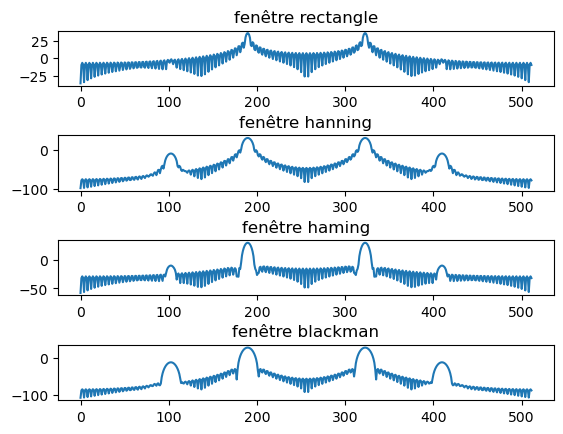

In [95]:
#Vous créerez des signaux contenant les K = 100 premiers points de chaque fenêtre
k=128
rect=np.ones(k)
rect=np.concatenate((rect,np.zeros(fe-k)))
han=sg.hann(k)
han=np.concatenate((han,np.zeros(fe-k)))
hamm=sg.hamming(k)
hamm=np.concatenate((hamm,np.zeros(fe-k)))
black=sg.blackman(k)
black=np.concatenate((black,np.zeros(fe-k)))
x=np.arange(512)

fig,axe=plt.subplots(4,1)
plt.subplots_adjust(hspace=0.9)
axe[0].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(rect*signal,512)))))
axe[0].set_title('fenêtre rectangle')
axe[1].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(han*signal,512)))))
axe[1].set_title('fenêtre hanning')
axe[2].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(hamm*signal,512)))))
axe[2].set_title('fenêtre haming')
axe[3].plot(x,20*np.log10(np.abs(np.fft.fftshift(fft(black*signal,512)))))
axe[3].set_title('fenêtre blackman')

# Le mieux est de choisir la fenetre blackman parce qui'il represent mieux les frequences